# Однослойный перцептрон


In [1]:
import numpy as np

# Функция активации нейрона в выходном слое и ее производная
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
def dsigmoid(y):
    return y * (1 - y)

# Функция активации нейронов во внутреннем слое и ее производная
def tanh(x):
    return np.tanh(x)
def dtanh(y):
    return 1 - y * y

In [2]:
from matplotlib import pyplot as plt

class Perceptron:
    def __init__(self, X, Y, hidden_size):
        
        # Пусть n - количество признаков, m - количество объектов, k - размерность результирующего вектора
        # Тогда X = X(n * m), Y = Y(k, m)
        assert X.shape[1] == Y.shape[1]
        self.X = X
        self.Y = Y
        self.m = X.shape[1]
        
        # Инициализируем матрицы весов рандомными числами (W1 - для скрытого слоя, W2 - для выходного, в нем всего 1 нейрон)
        self.W1 = np.random.randn(hidden_size, X.shape[0])
        self.W2 = np.random.randn(Y.shape[0], hidden_size)
        
        # Заполняем свободные векторы нулями
        self.b1 = np.zeros((hidden_size, 1))
        self.b2 = np.zeros((Y.shape[0], 1))
        
        # Здесь будем накапливать значения функции потерь на каждой итерации
        self.ce_loss = []
        self.mse_loss = []
        
    def learn(self, iter_num, learning_rate):
        
        # Итерируемся необходимое количество раз
        for i in range(iter_num):
            
            # Расчет взыешенных сумм каждого из нейронов, применение функций активации
            # Для того, чтобы заменить функции активации, необходимо заменить функцию при вычислении А1/А2
            Z1 = np.dot(self.W1, self.X) + self.b1                                     # (hidden_size, X.shape[1])
            A1 = tanh(Z1)
            Z2 = np.dot(self.W2, A1) + self.b2                                         # (Y.shape[0], X.shape[1] = Y.shape[1])
            A2 = sigmoid(Z2)

            # Среднеквадратичная (MSE) функция потерь
            mse_loss = np.sum((A2 - self.Y) ** 2) / self.m
            
            # Cross entropy функция потерь
            eps = 1e-8
            logprobs = self.Y * np.log(A2 + eps) + (1 - self.Y) * np.log(1 - A2 + eps)
            ce_loss = (-1 / self.m) * np.sum(logprobs)
            
            # Запоминание значения функции потерь и печать на каждой 1000-й итерации
            self.mse_loss.append(mse_loss)
            self.ce_loss.append(ce_loss)
            if i % 1000 == 0: print(f"MSE loss: {mse_loss}, CE loss: {ce_loss}")

            # Алгоритм обратного распространения ошибки
            # Производные высчитываются по правилу производной для сложной функции
            # Оптимизируется среднеквадратичная функция потерь
            # Для оптимизации cross entropy необходимо заменить производную функции потерь по A2 - self.Y
            # Для этого необходимо найти dError/dW
            # При замене функций активации необходимо также заменить соответствующую ей производную
            dA2 = (A2 - self.Y) * dsigmoid(A2)        # dLoss/dA * dSig/dZ2            # (Y.shape[0], Y.shape[1] = X.shape[1])
            dW2 = np.dot(dA2, A1.T)                   # dZ2/dW2                        # (Y.shape[0], hidden_size)
            db2 = np.sum(dA2, axis=1, keepdims=True)                                   # (Y.shape[0], 1)
            dA1 = np.dot(self.W2.T, dA2) * dtanh(A1)  # dA2 * dZ2/dA1 * dTanh/dZ       # (hidden_size, Y.shape[1] = X.shape[1])
            dW1 = np.dot(dA1, self.X.T)               # dZ1/dW                         # (hidden_size, X.shape[0])
            db1 = np.sum(dA1, axis=1, keepdims=True)                                   # (hidden_size, 1)
            
            # Обновление весов методом градиентного спуска
            self.W2 -= learning_rate * dW2
            self.b2 -= learning_rate * db2
            self.W1 -= learning_rate * dW1
            self.b1 -= learning_rate * db1
            
    def predict(self, X):
        # Используем найденные матрицы весов
        A1 = tanh(np.dot(self.W1, X) + self.b1)
        A2 = sigmoid(np.dot(self.W2, A1) + self.b2)
        return (A2[0] > 0.5).astype(int)
    
    def plot(self):
        plt.figure(figsize=(10,3))
        plt.subplot(1, 2, 1)
        plt.ylabel('MSE loss')
        plt.xlabel('Iterations')
        plt.plot(self.mse_loss)
        plt.subplot(1, 2, 2)
        plt.ylabel('CE loss')
        plt.xlabel('Iterations')
        plt.plot(self.ce_loss)

## Использование 2 нейронов для XOR

In [3]:
X = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]]).T
Y = np.array([[0, 1, 1, 0]])

# создаем объект класса, третий параметр отвечает за количество нейронов в скрытом слою (целое больше либо равно 1)
perceptron = Perceptron(X, Y, 2)

# вызываем методы класса, первый параметр - число итераций (целое от 1 до беск), второй - шаг обучения (float больше нуля)
perceptron.learn(10000, 0.05)
perceptron.predict(X)

MSE loss: 0.26114698950330983, CE loss: 0.7220713144327597
MSE loss: 0.026607786808582976, CE loss: 0.176491645786084
MSE loss: 0.008258589317910302, CE loss: 0.09428516656607902
MSE loss: 0.0045773257255614895, CE loss: 0.06928740299293133
MSE loss: 0.0031055601119806438, CE loss: 0.056696016580718225
MSE loss: 0.002330020722305589, CE loss: 0.04890797739039841
MSE loss: 0.0018558661981871846, CE loss: 0.043524655119455934
MSE loss: 0.001537744267256149, CE loss: 0.039535147624041284
MSE loss: 0.001310296378662612, CE loss: 0.036434109123061324
MSE loss: 0.0011399835157594373, CE loss: 0.03393855259154661


array([0, 1, 1, 0])

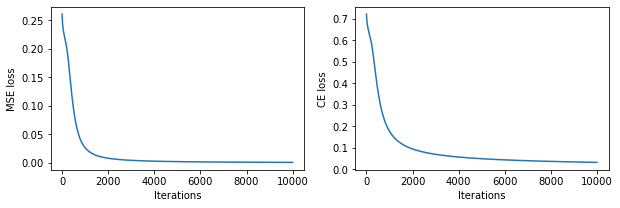

In [4]:
# Строим график зависимости функций потерь от номера итерации
perceptron.plot()

## Разделение цветочка

In [5]:
# Создать датасет в виде цветочка, m - кол-во объектов (целое больше 1), a - максимальная длина листа (float больше 0)
def create_flower(m, a):
    D = 2
    N = int(m/2)
    X = np.zeros((m,D))
    Y = np.zeros((m,1), dtype='uint8')
    for j in range(2):
        ix = range(N*j,N*(j+1))
        t = np.linspace(j*3.12,(j+1)*3.12,N) + np.random.randn(N)*0.2
        r = a*np.sin(4*t) + np.random.randn(N)*0.2
        X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
        Y[ix] = j
    return X.T, Y.T

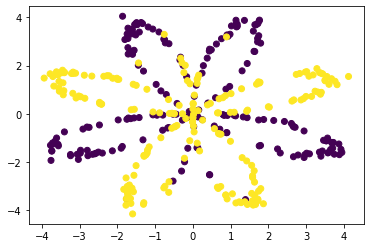

In [6]:
# Создаем и рисуем датасет в форме цветочка с 1000 объектов, цветами обозначены метки классов
X, Y = create_flower(400, 4)
plt.scatter(X[0, :], X[1, :], c=Y);

In [7]:
# Строим разделяющую  прямую, показывающую результат обучения нейросети
def plot_division(perceptron):
    x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
    y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
    h = 0.01
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = perceptron.predict(np.c_[xx.ravel(), yy.ravel()].T)
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.scatter(X[0, :], X[1, :], c=Y, cmap=plt.cm.Spectral);

### Один нейрон

In [8]:
perceptron = Perceptron(X, Y, 1)
perceptron.learn(10000, 0.1)

MSE loss: 0.29791496161264275, CE loss: 0.8008074035926405
MSE loss: 0.22148685036877175, CE loss: 0.6350764515078516
MSE loss: 0.22102224987699018, CE loss: 0.6340902145987363
MSE loss: 0.22078769769810477, CE loss: 0.6335922835064698
MSE loss: 0.2206349144506732, CE loss: 0.6332689214776125
MSE loss: 0.22052328432643312, CE loss: 0.6330329416277898
MSE loss: 0.22043645883101776, CE loss: 0.6328493995665485
MSE loss: 0.22036617435546893, CE loss: 0.6327007565575701
MSE loss: 0.22030764280881468, CE loss: 0.6325768986533029
MSE loss: 0.22025783808789007, CE loss: 0.6324714495620222


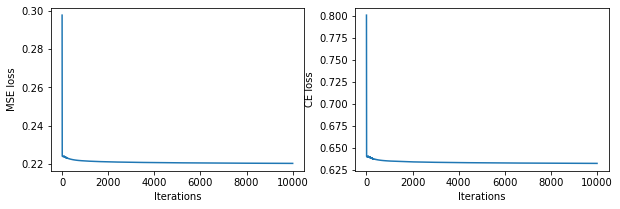

In [9]:
perceptron.plot()

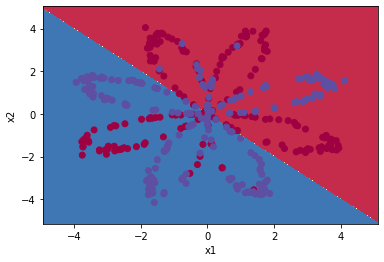

In [10]:
# Строим разделяющую  прямую, показывающую результат обучения нейросети
plot_division(perceptron)

### Четыре нейрона

In [11]:
perceptron = Perceptron(X, Y, 4)
perceptron.learn(10000, 0.1)

MSE loss: 0.30063971278356333, CE loss: 0.830338460733951
MSE loss: 0.06974274121270467, CE loss: 0.22692972632329608
MSE loss: 0.06731854268351206, CE loss: 0.21855213430757126
MSE loss: 0.06629620398805133, CE loss: 0.21490162868419993
MSE loss: 0.06558414572481085, CE loss: 0.21239625539702572
MSE loss: 0.06494942018835859, CE loss: 0.210758301500326
MSE loss: 0.06423610851985995, CE loss: 0.20997106751868339
MSE loss: 0.06349082435519521, CE loss: 0.20973999493332393
MSE loss: 0.06284474983484355, CE loss: 0.20981994635064496
MSE loss: 0.06237692855312987, CE loss: 0.2100922860362936


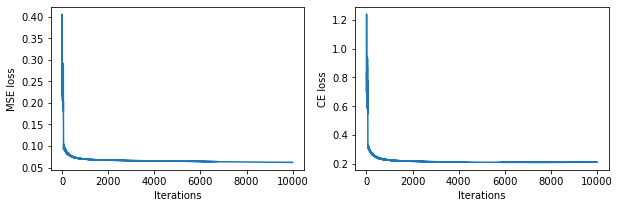

In [12]:
perceptron.plot()

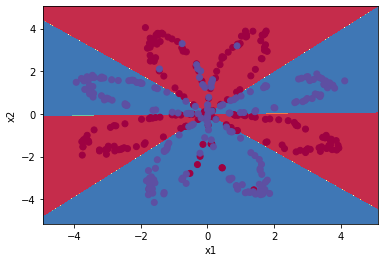

In [13]:
plot_division(perceptron)

### 50 нейронов - переобучение

In [14]:
perceptron = Perceptron(X, Y, 40)
perceptron.learn(10000, 0.1)

MSE loss: 0.4423301062099807, CE loss: 1.5818909049190089
MSE loss: 0.0829088921978959, CE loss: 0.9498663082991294
MSE loss: 0.0797739614330081, CE loss: 1.0525349929122538
MSE loss: 0.0761124826314018, CE loss: 1.1889755242561248
MSE loss: 0.07365364269366034, CE loss: 1.2704307828214756
MSE loss: 0.0728669649455595, CE loss: 1.27955895292017
MSE loss: 0.07226422088213579, CE loss: 1.2871019978960145
MSE loss: 0.07395618993718785, CE loss: 1.296923007073358
MSE loss: 0.07306537594502763, CE loss: 1.2994730281728823
MSE loss: 0.07079530290945729, CE loss: 1.2940784512749135


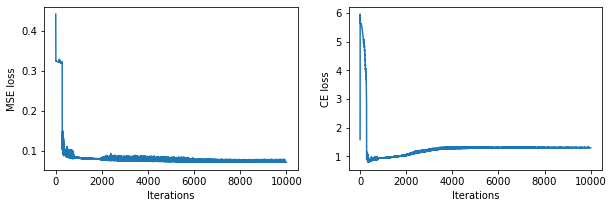

In [15]:
perceptron.plot()

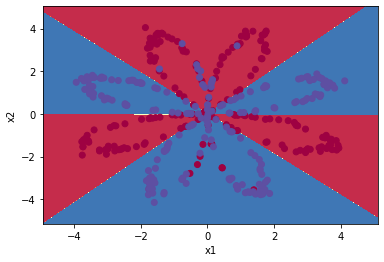

In [16]:
plot_division(perceptron)